## DarkELF absorption notebook

This notebook is meant to illustrate how to use DarkELF to calculate dark photon absorption rates.

written by Tongyan Lin & Simon Knapen, 04/20/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# uses matplotlib-label-lines, see for example https://github.com/cphyc/matplotlib-label-lines
from labellines import labelLine, labelLines

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

from darkelf import darkelf, targets

Most materials come with grids for both phonon ELFs and electronic ELFs:

In [2]:
targets.files("Si")

Available configuration files: 
	 Si.yaml
 
Available data for epsilon: 
	 Si_Migdal_FAC.dat
	 Si_atomic_Zion.dat
	 Si_mermin.dat
	 Si_gpaw_noLFE.dat
	 Si_gpaw_withLFE.dat
	 Si_epsphonon_theory6K.dat
	 Si_epsphonon_data6K.dat
	 Si_Zion.dat
 
Available data for phonon density of states: 
	 Si_DoS.dat
 
Available data for phonon partial density of states: 
 
Available data for Fn(omega) functions: 
	 Si_Fn.dat
 
Available data for form factors: 


## Example

To make use of phonon processes, a phonon ELF file has to be specified using the "phonon_filename" flag:

In [3]:
si = darkelf(mX=1e1,target='Si',filename='Si_gpaw_noLFE.dat',phonon_filename="Si_epsphonon_data6K.dat")

 .... Loading files for Si
Loaded Si_gpaw_noLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
phonon ELF taken or calculated from M. Ikezawa and M. Ishigame, Far-Infrared AbsorptionDue to the Two-Phonon Difference Process in Si, Journal of the Physical Society of Japan 50(1981) 3734.
Loaded Si_epsphonon_data6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded Si_atomic_Zion.dat for dark photon couplings
Loaded Si_DoS.dat for density of states
Loaded Fn(omega)

In [5]:
?si.R_absorption

In [4]:
print(si.R_absorption(kappa=1.0))

8.067874215350231e+32


Simple function to extract a limit, assuming 3.6 events

In [5]:
def kappa_limit(target,mX):
    scalar_input = np.isscalar(mX)
    mXlist = np.atleast_1d(mX)
    lim=[]
    
    for mX in mXlist:
        target.update_params(mX=mX)
        rate=target.R_absorption(kappa=1.0)
        if rate==0.0:
            lim.append(np.nan)
        else:
            lim.append(np.sqrt(3.0/rate))
            
    if(scalar_input):
        return lim[0]
    else:
        return np.array(lim) 

In [6]:
# electron regime
print(kappa_limit(si,10.0))

# phonon regime
print(kappa_limit(si,0.1))

6.09791081165515e-17
8.475403123945507e-15


# Plot with many targets

In [7]:
ge = darkelf(target='Ge',filename='Ge_gpaw_noLFE.dat',phonon_filename="Ge_epsphonon_data2K.dat")
simermin = darkelf(target='Si',filename='Si_mermin.dat',phonon_filename="Si_epsphonon_data6K.dat")
gemermin = darkelf(target='Ge',filename='Ge_mermin.dat',phonon_filename="Ge_epsphonon_data2K.dat")

GaAs = darkelf(target='GaAs',filename="GaAs_mermin.dat",phonon_filename="GaAs_epsphonon_data10K.dat")

GaN = darkelf(target='GaN',filename="GaN_mermin.dat",phonon_filename="GaN_epsphonon_300K.dat")

Al = darkelf(target='Al',filename="Al_mermin.dat")

SiO2 = darkelf(target='SiO2',filename="SiO2_mermin.dat",phonon_filename="SiO2_epsphonon_o.dat")
SiO2_e = darkelf(target='SiO2',targetyaml='SiO2_extraordinary',
                 filename="SiO2_mermin.dat",phonon_filename="SiO2_epsphonon_e.dat")

SiC = darkelf(target='SiC',phonon_filename="SiC_epsphonon_3C.dat")
ZnS = darkelf(target='ZnS',filename="ZnS_mermin.dat",phonon_filename="ZnS_epsphonon_300K.dat")

Al2O3 = darkelf(target='Al2O3',filename="Al2O3_mermin.dat",phonon_filename="Al2O3_epsphonon_o.dat")
Al2O3_e = darkelf(target='Al2O3',targetyaml='Al2O3_extraordinary',filename="Al2O3_mermin.dat",phonon_filename="Al2O3_epsphonon_e.dat")


 .... Loading files for Ge
Loaded Ge_gpaw_noLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
phonon ELF taken or calculated from M. Ikezawa and T. Nanba, Two-Phonon Difference Absorption Spectra in Ge Crystals, Journal of  the Physical Society of Japan 45 (1978) 148.
Loaded Ge_epsphonon_data2K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded Ge_atomic_Zion.dat for dark photon couplings
Loaded Ge_DoS.dat for density of states
Loaded Fn(omega) functions corre

 .... Loading files for Al2O3
Loaded Al2O3_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from  F. Gervais and B. Piriou, Anharmonicity in several-polar-mode crystals:  adjusting phonon self-energy of LO and TO modes in Al2O3 and TiO2 to fit infrared reflectivity,Journal of Physics C Solid State Physics 7 (1974) 2374 and M. Schubert, T.E. Tiwald and C.M. Herzinger, Infrared dielectric anisotropy and phonon modes of sapphire, Phys. Rev. B61(2000) 8187
Loaded Al2O3_epsphonon_o.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum Zion not loaded. Using Z - number of valence electrons.
Warning! Dark photon fd not loaded. Need to set fd_filename for both atoms
Warning! Density of states not loaded. Need to set dos_filename for both a

For Ge, there are some unphysical wiggles at high omega. This due to a numerical artifact when converting the Novak et al parametrization to the Mermin model. We smooth this out by fitting the rate to a smooth polynomial:

/Users/ethanvillarama/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


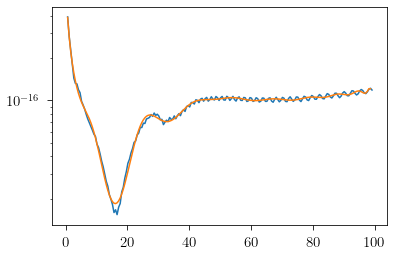

In [8]:
mVelectron = np.linspace(gemermin.E_gap,100,200)
mVphonon = np.linspace(.03,.08,100)
a = kappa_limit(gemermin,mVelectron)

fitparam=np.polyfit(mVelectron[:-3],np.log10(a)[:-3],30)
aa = (lambda mV: 10**np.poly1d(fitparam)(mV))

plt.plot(mVelectron,a,label='Ge')
plt.plot(mVelectron[:-3],list(map(aa,mVelectron[:-3])),label='Ge')
plt.yscale("log")
plt.show()


/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87743/4228469574.py:12: RuntimeWarning: invalid value encountered in sqrt
  lim.append(np.sqrt(3.0/rate))
/Users/ethanvillarama/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


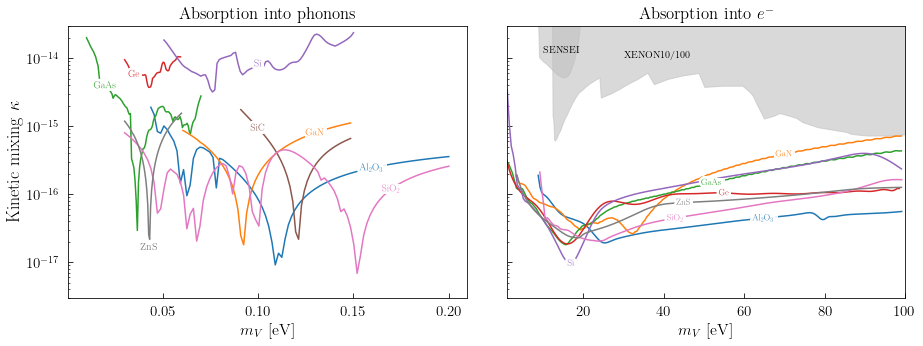

In [9]:
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0.0,1.0,10))

fig, axs = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.subplots_adjust(wspace=0.1)

props = dict(facecolor='white', alpha=0.9, edgecolor='white',boxstyle="square,pad=0.025")

# Al2O3
mVelectron = np.linspace(Al2O3.E_gap,100,200)
mVphonon = np.linspace(.03,.2,100)
a = kappa_limit(Al2O3,mVelectron)
axs[1].plot(mVelectron,a,color=colors[0],label=r'Al$_2$O$_3$')
b1 = kappa_limit(Al2O3,mVphonon)
b2 = kappa_limit(Al2O3_e,mVphonon)
b = pow(1./3*1./b1**2 + 2./3*1./b2**2,-0.5)
axs[0].plot(mVphonon,b,color=colors[0],label=r'Al$_2$O$_3$')

# GaN
mVelectron = np.linspace(GaN.E_gap,100,200)
mVphonon = np.linspace(.05,.2,100)
a = kappa_limit(GaN,mVelectron)
axs[1].plot(mVelectron,a,color=colors[1],label='GaN')
b = kappa_limit(GaN,mVphonon)
axs[0].plot(mVphonon,b,color=colors[1],label='GaN')

# GaAs
mVelectron = np.linspace(GaAs.E_gap,100,200)
mVphonon = np.linspace(.01,.07,100)
a = kappa_limit(GaAs,mVelectron)
axs[1].plot(mVelectron,a,color=colors[2],label='GaAs')
b = kappa_limit(GaAs,mVphonon)
axs[0].plot(mVphonon,b,color=colors[2],label='GaAs')


# Ge
mVelectron = np.linspace(gemermin.E_gap,100,200)
mVphonon = np.linspace(.03,.08,100)
a = kappa_limit(gemermin,mVelectron)
fitparam=np.polyfit(mVelectron[:-3],np.log10(a)[:-3],30) # need to smooth out Ge curve, due to numerical artifact
aa = (lambda mV: 10**np.poly1d(fitparam)(mV))
axs[1].plot(mVelectron[:-3],list(map(aa,mVelectron[:-3])),color=colors[3],label='Ge')
b = kappa_limit(gemermin,mVphonon)
axs[0].plot(mVphonon,b,color=colors[3],label='Ge')

# SI
mVelectron = np.linspace(simermin.E_gap,100,200)
mVphonon = np.linspace(.03,.15,100)
a = kappa_limit(simermin,mVelectron)
axs[1].plot(mVelectron,a,color=colors[4],label='Si')
b = kappa_limit(simermin,mVphonon)
axs[0].plot(mVphonon,b,color=colors[4],label='Si')

# SIC
mVphonon = np.linspace(.05,.2,100)
b = kappa_limit(SiC,mVphonon)
axs[0].plot(mVphonon,b,color=colors[5],label='SiC')

# SIO2
mVelectron = np.linspace(SiO2.E_gap,100,200)
mVphonon = np.linspace(.03,.2,100)
a = kappa_limit(SiO2,mVelectron)
axs[1].plot(mVelectron,a,color=colors[6],label=r'SiO$_2$')
b1 = kappa_limit(SiO2,mVphonon)
b2 = kappa_limit(SiO2_e,mVphonon)
b = pow(1./3*1./b1**2 + 2./3*1./b2**2,-0.5)
axs[0].plot(mVphonon,b,color=colors[6],label=r'SiO$_2$')

# ZnS
mVelectron = np.linspace(ZnS.E_gap,100,200)
mVphonon = np.linspace(.03,.08,100)
a = kappa_limit(ZnS,mVelectron)
axs[1].plot(mVelectron,a,color=colors[7],label='ZnS')
b = kappa_limit(ZnS,mVphonon)
axs[0].plot(mVphonon,b,color=colors[7],label='ZnS')

### Plot settings for left panel
axs[0].set_yscale('log')
axs[0].set_ylim([3e-18,3e-14])
axs[0].tick_params(direction='in',which='both',pad=8)
axs[0].set_xlabel(r'$m_V$ [eV]',fontsize=16)
axs[0].set_ylabel(r'Kinetic mixing $\kappa$',fontsize=18)

lines = axs[0].get_lines()
labelLines(lines,xvals=[0.16,0.13,.02,0.035,0.1,0.1,0.17],fontsize=10,zorder=2.5,
           ha='center',va='center',align=False,bbox=props)
axs[0].text(0.038,1.5e-17,r'ZnS',color=colors[7],fontsize=10,bbox=props)
axs[0].set_title('Absorption into phonons')

### Plot settings for right panel

dat = np.loadtxt('data/kappa_limit_xenon.txt').T
axs[1].fill_between(dat[0],dat[1],dat[1]*0.0+1e-13,color='Silver',alpha=0.6)
dat = np.loadtxt('data/kappa_limit_SENSEI2020.txt').T
axs[1].fill_between(dat[0],dat[1],dat[1]*0.0+1e-13,color='Silver',alpha=0.6)
axs[1].text(30,1e-14,'XENON10/100',fontsize=10)
axs[1].text(10,1.2e-14,'SENSEI',fontsize=10)

axs[1].set_xlim([1.0,100])
axs[1].tick_params(direction='in',which='both',pad=8)
axs[1].set_xlabel(r'$m_V$ [eV]',fontsize=16)

lines = axs[1].get_lines()
labelLines(lines,xvals=[65,70,52,55,17,43,45],fontsize=9,zorder=2.5,
           ha='center',va='center',align=False,bbox=props)
axs[1].set_title('Absorption into $e^-$')

fig.savefig('plots/darkelf_absorption_1.pdf',bbox_inches='tight')

### The reach does not depend too much on how ordinary and extraordinary response are averaged

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87743/4228469574.py:12: RuntimeWarning: invalid value encountered in sqrt
  lim.append(np.sqrt(3.0/rate))


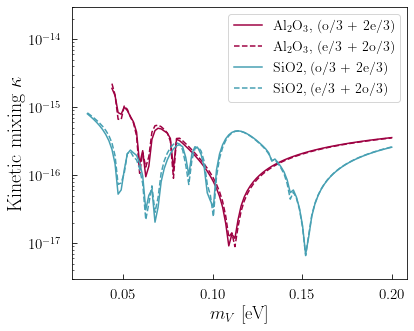

In [10]:
cmap = plt.get_cmap('Spectral')
colors = cmap(np.linspace(0.0,1.0,8))

fig, axs = plt.subplots(1,1,figsize=(6,5))

# Al2O3
mVphonon = np.linspace(.03,.2,100)
b1 = kappa_limit(Al2O3,mVphonon)
b2 = kappa_limit(Al2O3_e,mVphonon)
# 1/3 * ordinary + 2/3 * extraordinary
b = pow(1./3*1./b1**2 + 2./3*1./b2**2,-0.5)
axs.plot(mVphonon,b,color=colors[0],label=r'Al$_2$O$_3$, (o/3 + 2e/3)')
# 2/3 * ordinary + 1/3 * extraordinary
b = pow(2./3*1./b1**2 + 1./3*1./b2**2,-0.5)
axs.plot(mVphonon,b,color=colors[0],label=r'Al$_2$O$_3$, (e/3 + 2o/3)',linestyle='--')

# SIO2
mVphonon = np.linspace(.03,.2,100)
b1 = kappa_limit(SiO2,mVphonon)
b2 = kappa_limit(SiO2_e,mVphonon)
# 1/3 * ordinary + 2/3 * extraordinary
b = pow(1./3*1./b1**2 + 2./3*1./b2**2,-0.5)
axs.plot(mVphonon,b,color=colors[6],label='SiO2, (o/3 + 2e/3)')
# 2/3 * ordinary + 1/3 * extraordinary
b = pow(2./3*1./b1**2 + 1./3*1./b2**2,-0.5)
axs.plot(mVphonon,b,color=colors[6],label='SiO2, (e/3 + 2o/3)',linestyle='--')

### Plot settings for left panel
axs.set_yscale('log')
axs.set_ylim([3e-18,3e-14])
axs.tick_params(direction='in',which='both',pad=10)
axs.set_xlabel(r'$m_V$ [eV]',fontsize=18)
axs.set_ylabel(r'Kinetic mixing $\kappa$',fontsize=20)

axs.legend()
fig.savefig('plots/darkelf_absorption_2.pdf',bbox_inches='tight')